In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df = pd.read_csv('data/mushroom.csv')

In [19]:
for col in df.columns:
    df[col] = df[col].str[1:]
df = df.replace({"'":""}, regex=True)
df

cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0            x           s         n          t    p               f   
1            x           s         y          t    a               f   
2            b           s         w          t    l               f   
3            x           y         w          t    p               f   
4            x           s         g          f    n               f   
5            x           y         y          t    a               f   
6            b           s         w          t    a               f   
7            b           y         w          t    l               f   
8            x           y         w          t    p               f   
9            b           s         y          t    a               f   
10           x           y         y          t    l               f   
11           x           y         y          t    a               f   
12           b           s         y          t    a               f   
13           x           y         w          t    p               f   
14           x           f         n          f    n               f   
15           s           f         g          f    n               f   
16           f           f         w          f    n               f   
17           x           s         n          t    p               f   
18           x           y         w          t    p               f   
19           x           s         n          t    p               f   
20           b           s         y          t    a               f   
21           x           y         n          t    p               f   
22           b           y         y          t    l               f   
23           b           y         w          t    a               f   
24           b           s         w          t    l               f   
25           f           s         w          t    p               f   
26           x           y         y          t    a               f   
27           x           y         w          t    l               f   
28           f           f         n          f    n               f   
29           x           s         y          t    a               f   
30           b           s         y          t    l               f   
31           x           y         w          t    p               f   
32           x           y         y          t    l               f   
33           x           y         n          t    l               f   
34           b           y         y          t    l               f   
35           x           f         y          t    l               f   
36           s           f         g          f    n               f   
37           x           y         n          t    p               f   
38           x           f         y          t    a               f   
39           b           s         y          t    l               f   
40           b           y         y          t    a               f   
41           x           y         y          t    l               f   
42           x           f         n          f    n               f   
43           x           y         w          t    p               f   
44           x           s         y          t    a               f   
45           x           y         w          t    a               f   
46           x           y         y          t    l               f   
47           x           s         w          t    l               f   
48           x           y         y          t    l               f   
49           f           y         y          t    l               f   
50           x           y         n          t    a               f   
51           x           s         w          t    l               f   
52           b           s         w          t    l               f   
53           x           y         n          t    p               f   
54           x           s         w         

In [25]:
def ohe(df, cat_cols, cat_dictionary):
    for col in cat_cols:
        # Check if column is in the category dictionary
        
        # Get the list of categories for the column
        categories = cat_dictionary[col]
        
        # Create new column names for each category
        new_cols = [f"{col}_{c}" for c in categories]
        
        # One-hot encode the column
        one_hot = pd.get_dummies(df[col], prefix=col)
        
        # Add columns for any missing categories
        for c in new_cols:
            if c not in one_hot.columns:
                one_hot[c] = 0
        
        # Add the one-hot encoded columns to the dataframe
        df = pd.concat([df, one_hot], axis=1)
        
        # Drop the original column from the dataframe
        df.drop(columns=[col], inplace=True)
    
    return df



In [26]:
df_dict = df.to_dict(orient = 'list')
for key in df_dict.keys():
    df_dict[key] = list(set(df_dict[key]))

In [31]:
df_ohe = ohe(df, df.columns, df_dict)

In [28]:
df_ohe = df_ohe.drop("class_e", axis=1)

X = df_ohe
y = df_ohe.pop("class_p")

cap-shape_b  cap-shape_c  cap-shape_f  \
cap-shape_b                    1.000000    -0.005387    -0.193260   
cap-shape_c                   -0.005387     1.000000    -0.017672   
cap-shape_f                   -0.193260    -0.017672     1.000000   
cap-shape_k                   -0.081769    -0.007477    -0.268226   
cap-shape_s                   -0.015264    -0.001396    -0.050070   
cap-shape_x                   -0.219564    -0.020077    -0.720235   
cap-surface_f                 -0.091638    -0.014032     0.064801   
cap-surface_g                  0.018820     0.249631    -0.006285   
cap-surface_s                  0.117712    -0.015038    -0.093397   
cap-surface_y                 -0.027947     0.015893     0.029076   
cap-color_b                    0.010011    -0.003225     0.019203   
cap-color_c                   -0.017912    -0.001638    -0.003687   
cap-color_e                   -0.115505    -0.010562     0.009128   
cap-color_g                   -0.069760    -0.012010     0.056794   
cap-color_n                   -0.084902    -0.013880     0.019014   
cap-color_p                    0.016231    -0.002981    -0.045696   
cap-color_r                   -0.010782    -0.000986     0.010211   
cap-color_u                   -0.010782    -0.000986     0.010211   
cap-color_w                    0.212380     0.024711    -0.088841   
cap-color_y                    0.117981     0.024136    -0.010390   
bruises%3F_f                  -0.115686    -0.003803    -0.045188   
bruises%3F_t                   0.115686     0.003803     0.045188   
odor_a                         0.262455    -0.005051    -0.097130   
odor_c                        -0.037764    -0.003453    -0.123876   
odor_f                        -0.146074    -0.013357     0.083449   
odor_l                         0.262455    -0.005051    -0.097130   
odor_m                        -0.016194    -0.001481    -0.007483   
odor_n                        -0.000314     0.025332     0.066856   
odor_p                        -0.043783    -0.004003     0.041464   
odor_s                        -0.067052    -0.006131    -0.030983   
odor_y                        -0.067052    -0.006131    -0.030983   
gill-attachment_a              0.122896    -0.003615    -0.043740   
gill-attachment_f             -0.122896     0.003615     0.043740   
gill-spacing_c                -0.039406    -0.050573     0.039154   
gill-spacing_w                 0.039406     0.050573    -0.039154   
gill-size_b                    0.148449    -0.033174     0.075766   
gill-size_n                   -0.148449     0.033174    -0.075766   
gill-color_b                  -0.126163    -0.011536    -0.058296   
gill-color_e                  -0.026543    -0.002427    -0.012265   
gill-color_g                   0.122587    -0.007089    -0.048604   
gill-color_h                  -0.076382    -0.006984     0.072336   
gill-color_k                   0.101547    -0.005104    -0.025790   
gill-color_n                   0.034751    -0.008542     0.007077   
gill-color_o                   0.075558    -0.001978    -0.025233   
gill-color_p                  -0.070747    -0.010527     0.059448   
gill-color_r                   0.105523    -0.001208     0.012513   
gill-color_u                  -0.061628    -0.005635     0.032947   
gill-color_w                   0.084884     0.037634    -0.013773   
gill-color_y                   0.064095     0.051922    -0.025588   
stalk-shape_e                  0.277873     0.025409    -0.116324   
stalk-shape_t                 -0.277873    -0.025409     0.116324   
stalk-root_?                   0.016347    -0.014712    -0.132855   
stalk-root_b                  -0.180976     0.001567     0.158506   
stalk-root_c                   0.482914     0.037935    -0.201805   
stalk-root_e                  -0.097062    -0.008875     0.080199   
stalk-root_r                  -0.037764    -0.003453     0.035764   
stalk-surface-above-ring_f    -0.065536    -0.005993     0.058050   
stalk-surface-above-ring_k

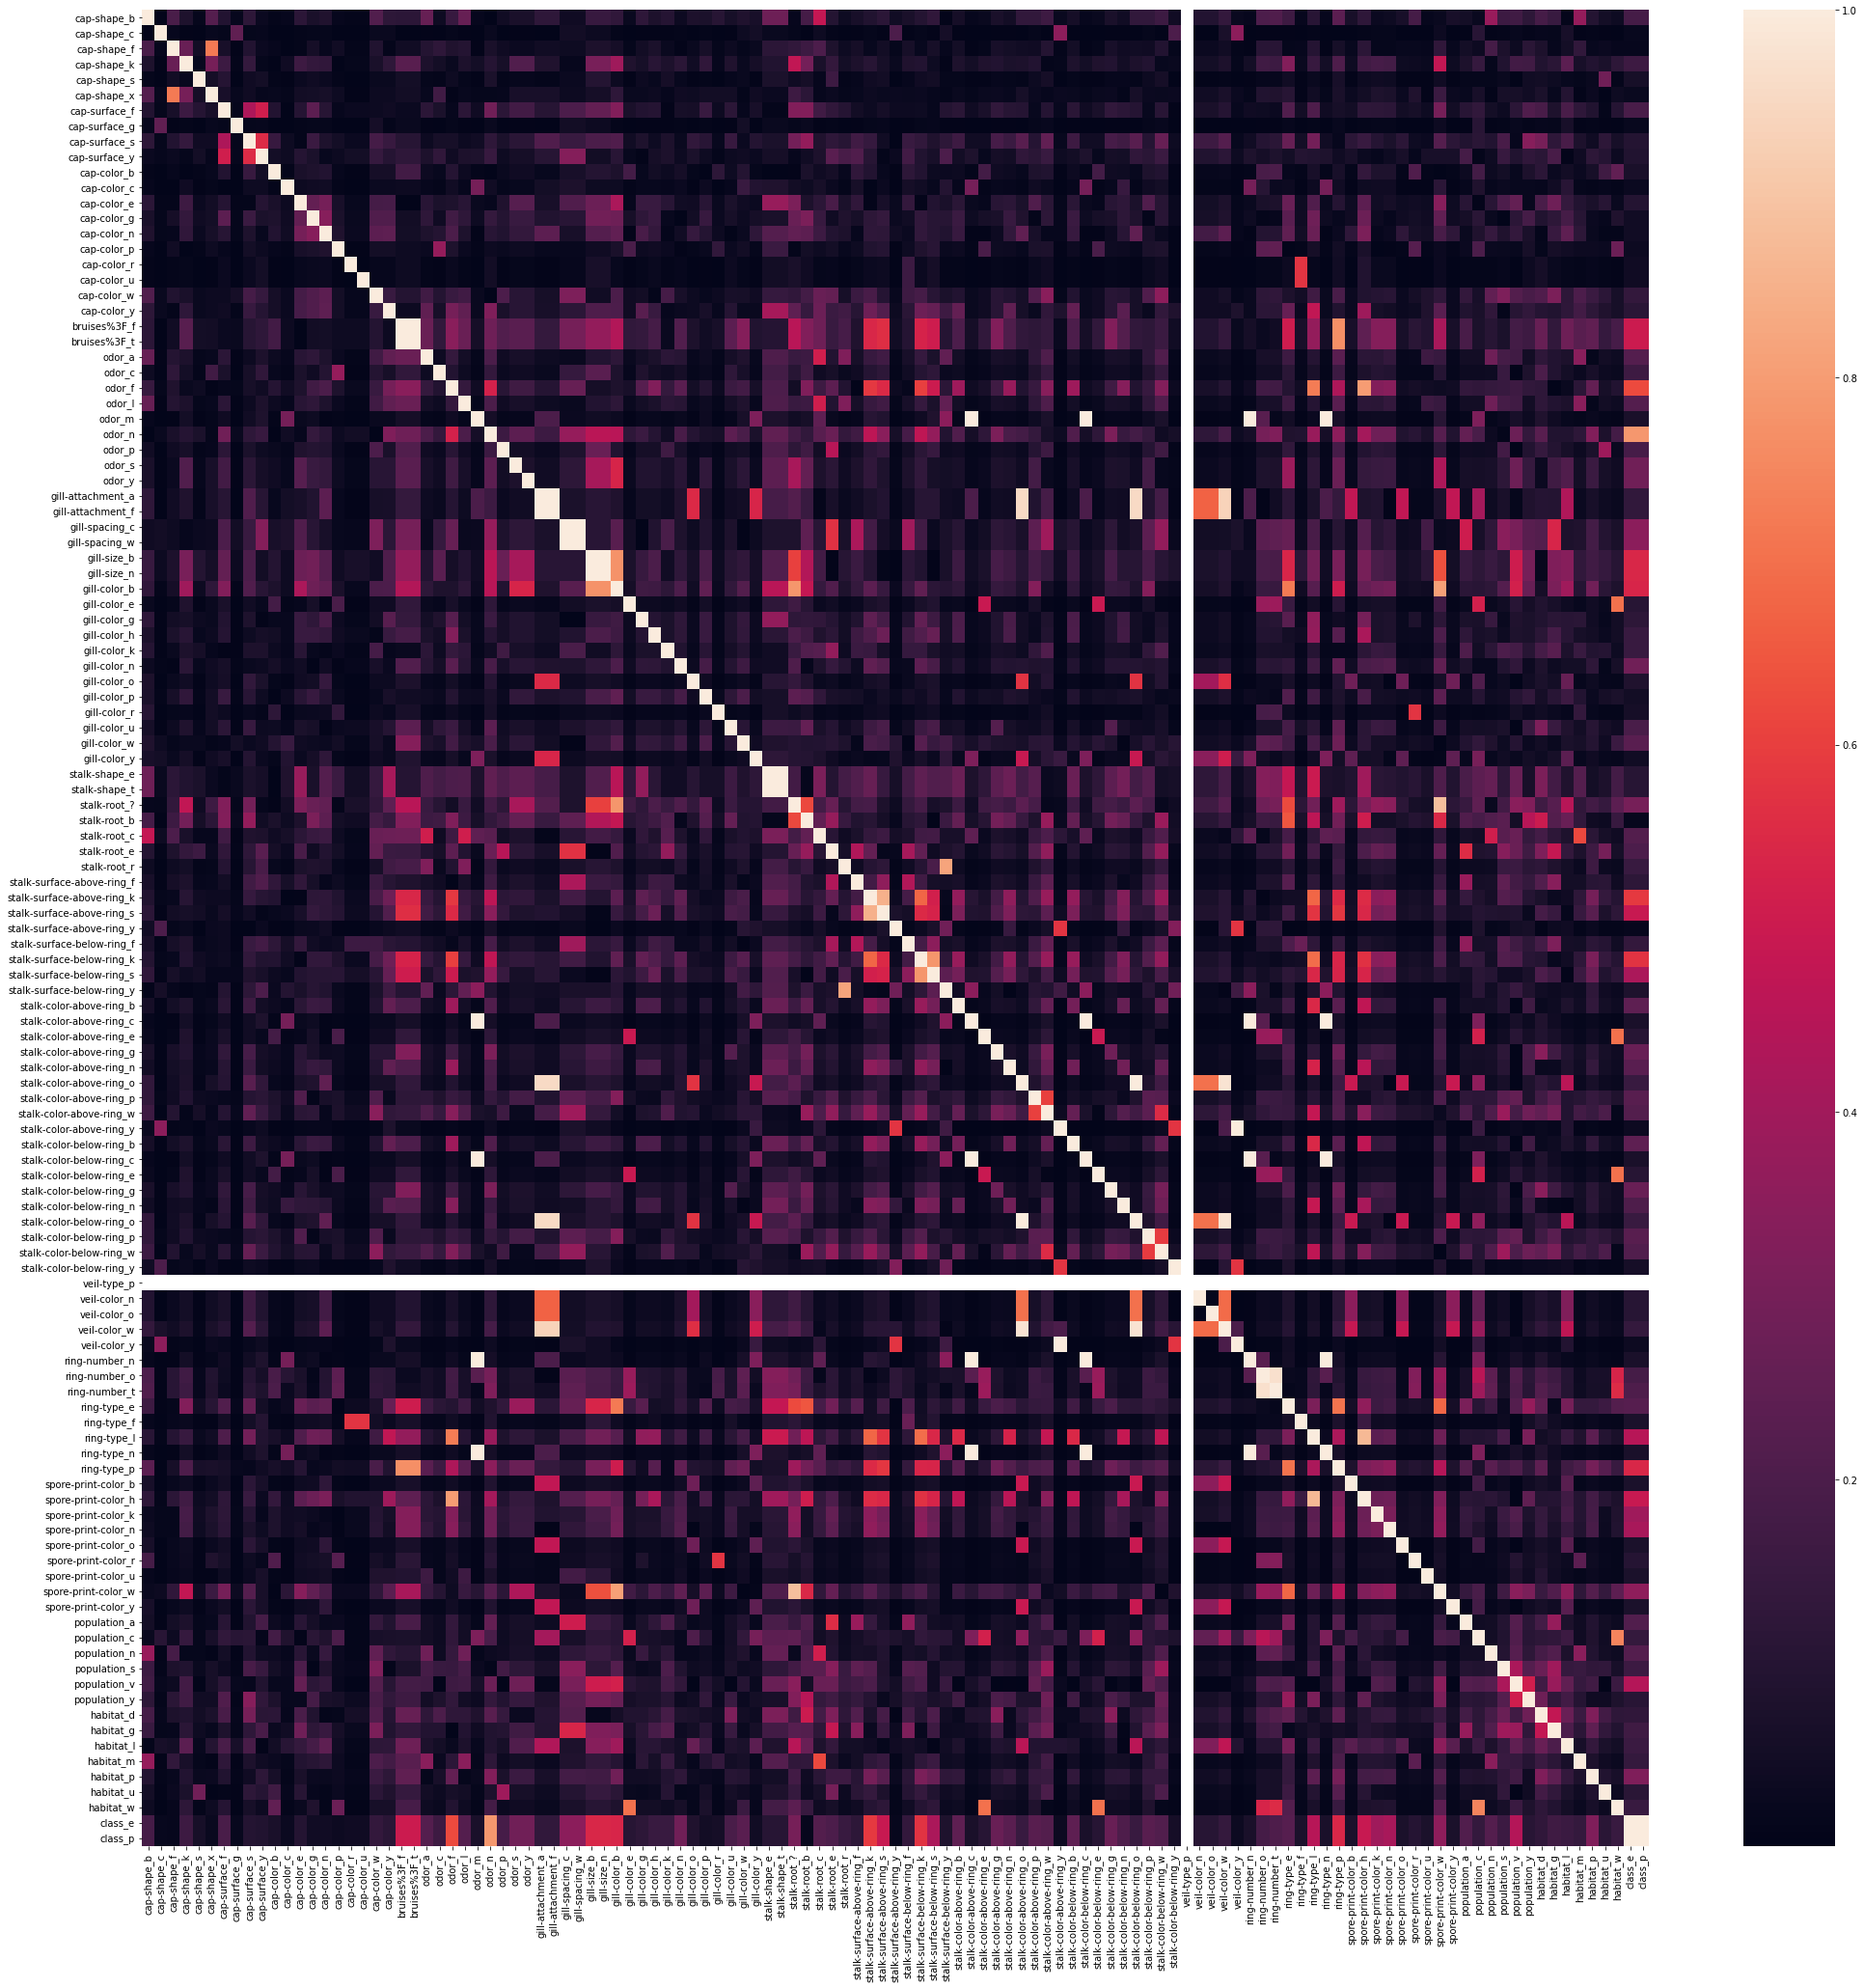

In [32]:
corr_matrix = df_ohe.corr()
fig, ax = plt.subplots(figsize = (35,35))
sns.heatmap(abs(corr_matrix))
pd.set_option('display.max_rows', None)
corr_matrix


## Logisitc Regression 

In [106]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [107]:
train_acc =model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Training accuracy: 1.0
Testing accuracy: 1.0


In [108]:
###manually making confusion table from a different threshold
def t_repredict(est, t, xtest):
    probs = est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred

In [109]:
from sklearn.metrics import confusion_matrix
threshold = 0.5
print(confusion_matrix(y_test,t_repredict(model, threshold, X_test)))
print(confusion_matrix(y_train,t_repredict(model, threshold, X_train)))

[[811   0]
 [  0 814]]
[[3397    0]
 [   0 3102]]


In [62]:
#making ROC curves for this model
from sklearn.metrics import roc_curve, auc

#name: name of your model to appear on the figure (can be arbitrary)
#clf: the model as you named it - will be used for getting the predictions
#ytest, xtest: your test data
#skip, labe: steps that control how many points you see in the ROC curve and how many labels are there

def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM? (but double-check this pleaseee)
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    
    #this is the single value for the AUC score
    roc_auc = auc(fpr, tpr)
    
    if skip: 
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    
    #add labels to the curve
    if labe!=None:
        for k in range(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

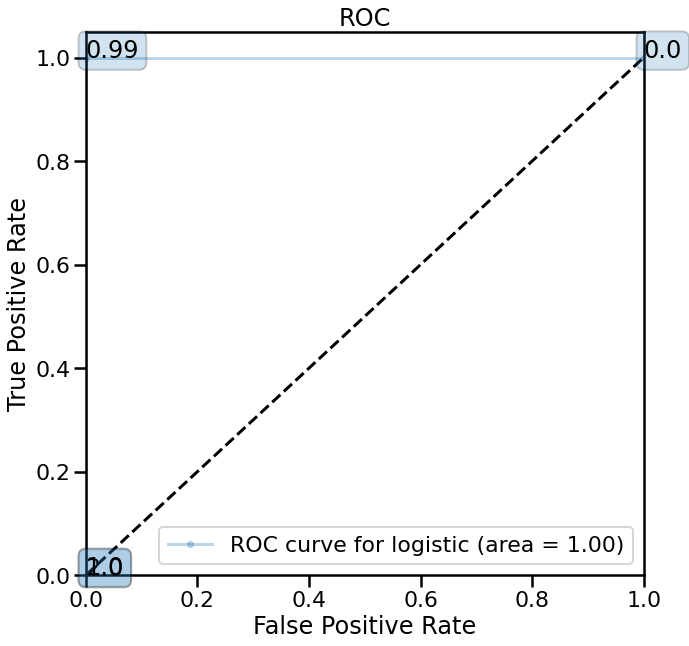

In [63]:
#This is how the above function should be used

sns.set_context("poster")
fig, ax = plt.subplots(figsize = (10,10))
ax=make_roc("logistic",model, y_test, X_test, labe=1,  skip=0)
plt.show()

# Random Forest 


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

RFmodel = RandomForestClassifier()

param_grid = {
    'n_estimators': [5, 10, 25],
    'max_depth': [None, 1, 5],
    'min_samples_split': [1, 2, 5]
}

grid_search = GridSearchCV(RFmodel, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 10}
Best score:  0.9586402425161046


In [76]:
 grid_search.best_params_

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 10}

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RFmodel = RandomForestClassifier(**grid_search.best_params_)


RFmodel.fit(X_train, y_train)
y_pred = RFmodel.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [79]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [80]:
import time
start_time = time.time()
importances = RFmodel.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFmodel.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.013 seconds


Text(0, 0.5, 'Mean decrease in impurity')

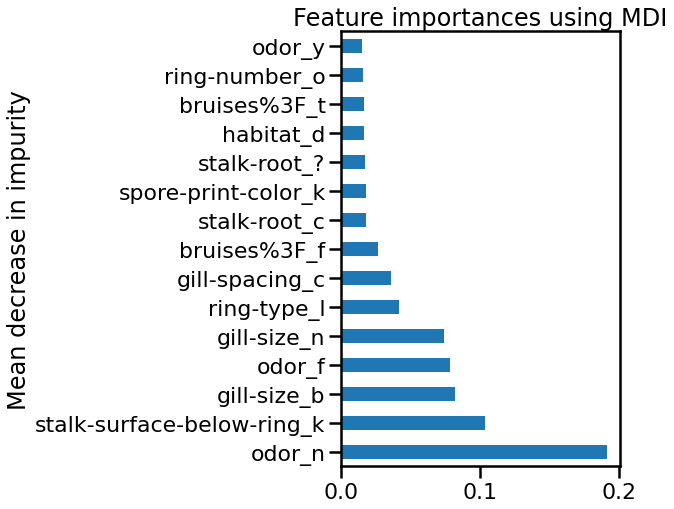

In [81]:
feature_names = [name for name in X.columns]
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize = (5,8))
forest_importances.head(15).plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")


In [82]:
feature_df = forest_importances.reset_index()
feature_df[['category', 'observation']] = feature_df['index'].str.split('_', n=1, expand=True)
feature_df = feature_df[['category', 'observation', 0]]
feature_df.columns = ['category', 'observation', 'value']


Text(0, 0.5, 'Mean decrease in impurity')

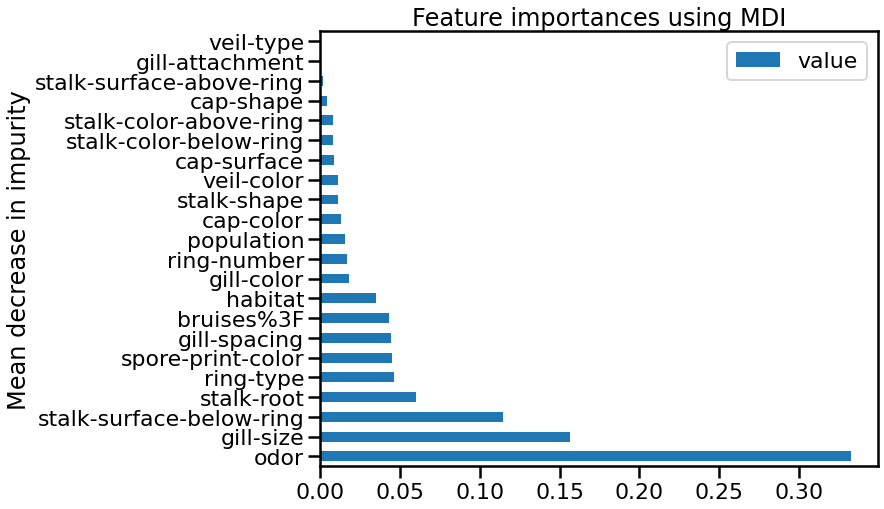

In [84]:
sorted_df = feature_df.groupby('category')['value'].sum().reset_index().sort_values('value', ascending=False)
sroted_df = sorted_df.set_index('category')
fig, ax = plt.subplots(figsize = (10,8))
sorted_df.plot.barh(x= 'category', y = 'value', ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")


In [85]:
sorted_df.set_index('category')

value
category                          
odor                      0.332402
gill-size                 0.156465
stalk-surface-below-ring  0.114796
stalk-root                0.060225
ring-type                 0.046530
spore-print-color         0.045295
gill-spacing              0.044695
bruises%3F                0.043286
habitat                   0.035348
gill-color                0.018553
ring-number               0.017166
population                0.015972
cap-color                 0.013195
stalk-shape               0.011560
veil-color                0.011342
cap-surface               0.008827
stalk-color-below-ring    0.008542
stalk-color-above-ring    0.008515
cap-shape                 0.004491
stalk-surface-above-ring  0.002045
gill-attachment           0.000750
veil-type                 0.000000

# Reduced logisitic regression


In [88]:
df_ohe = ohe(df, df.columns, df_dict)
X = df_ohe.loc[:,"odor_a":"odor_y"]
y = df_ohe["class_p"]

In [95]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.1)

model = LogisticRegression(C=10)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [96]:
train_acc =model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Training accuracy: 0.9853645192176173
Testing accuracy: 0.984009840098401
